In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors

C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


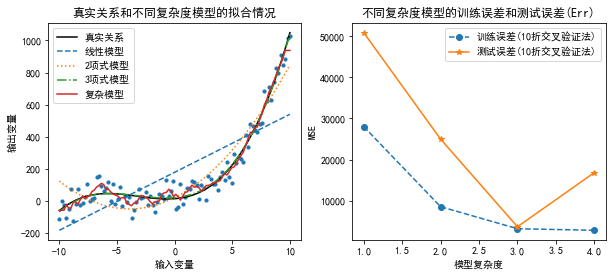

In [2]:
np.random.seed(123)
N=100
x=np.linspace(-10,10, num=N)
y=14+5.5*x+4.8*x**2+0.5*x**3
z=[]
for i in range(N):
    z.append(y[i]+np.random.normal(0,50))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axes[0].scatter(x,z,s=10)
axes[0].plot(x,y,'k-',label="真实关系")
modelLR=LM.LinearRegression()
X=x.reshape(N,1)
Y=np.array(z)
modelLR.fit(X,Y)
axes[0].plot(x,modelLR.predict(X),linestyle='--',label="线性模型")
linestyle=[':','-.']
degree=[2,3]
for i in range(len(degree)):
    tmp=pow(x,degree[i]).reshape(N,1)
    X=np.hstack((X,tmp))
    modelLR.fit(X,Y)
    axes[0].plot(x,modelLR.predict(X),linestyle=linestyle[i],label=str(degree[i])+"项式模型")
KNNregr=neighbors.KNeighborsRegressor(n_neighbors=5)
X=x.reshape(N,1)
KNNregr.fit(X,Y)
axes[0].plot(X,KNNregr.predict(X),linestyle='-',label="复杂模型")
axes[0].legend()
axes[0].set_title("真实关系和不同复杂度模型的拟合情况")
axes[0].set_xlabel("输入变量")
axes[0].set_ylabel("输出变量")

X=x.reshape(N,1)
Y=np.array(z)
modelLR.fit(X,Y)
np.random.seed(123)
k=10
scores = cross_validate(modelLR,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
MSEtrain=[-1*scores['train_score'].mean()]
MSEtest=[-1*scores['test_score'].mean()]
degree=[2,3]
for i in range(len(degree)):
    tmp=pow(x,degree[i]).reshape(N,1)
    X=np.hstack((X,tmp))
    modelLR.fit(X,Y)
    scores = cross_validate(modelLR,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
    MSEtrain.append((-1*scores['train_score']).mean())    
    MSEtest.append((-1*scores['test_score']).mean())
        
KNNregr=neighbors.KNeighborsRegressor(n_neighbors=5)
X=x.reshape(N,1)
KNNregr.fit(X,Y)
scores = cross_validate(KNNregr,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
MSEtrain.append((-1*scores['train_score']).mean())
MSEtest.append((-1*scores['test_score']).mean())

axes[1].plot(np.arange(1,len(degree)+3),MSEtrain,marker='o',label='训练误差(10折交叉验证法)',linestyle='--')
axes[1].plot(np.arange(1,len(degree)+3),MSEtest,marker='*',label='测试误差(10折交叉验证法)')

axes[1].legend()
axes[1].set_title("不同复杂度模型的训练误差和测试误差(Err)")
axes[1].set_xlabel("模型复杂度")
axes[1].set_ylabel("MSE")
fig.show()


说明：
1、利用通过数据模拟，直观展示模型的过拟合，以及过拟合模型下的训练误差和测试误差的特点。
2、这里，复杂模型为K近邻法建立的预测模型，是一种典型的非线性模型。具体内容详见第4章。
3、对不同复杂度模型，利用cross_validate()计算10折交叉验证下的训练误差和测试误差。随模型复杂度的提高，训练误差单调下降，测试误差呈先下降后来上升的U字形。显然，复杂模型的训练误差最小但测试误差并非最小，出现了模型的过拟合。
4、scores['train_score']为训练误差，scores['test_score']为测试误差。

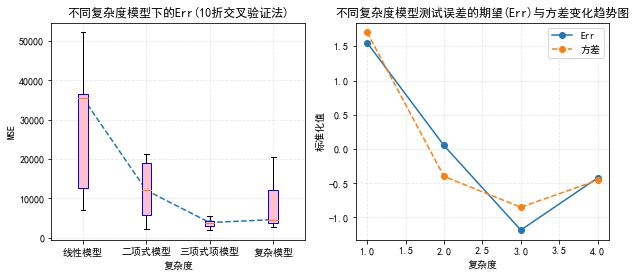

In [3]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
modelLR=LM.LinearRegression()
X=x.reshape(N,1)
Y=np.array(z)
modelLR.fit(X,Y)
np.random.seed(123)
k=10
scores = cross_validate(modelLR,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
fdata=pd.Series(-1*scores['test_score'])
axes[0].boxplot(x=fdata,sym='rd',patch_artist=True,boxprops={'color':'blue','facecolor':'pink'},labels ={"线性模型"},showfliers=False) 
MSEMedian=[np.median(-1*scores['test_score'])]
MSEVar=[(-1*scores['test_score']).var()]
MSEMean=[(-1*scores['test_score']).mean()]

degree=[2,3]
lab=['二项式模型','三项式项模型']
for i in range(len(degree)):
    tmp=pow(x,degree[i]).reshape(N,1)
    X=np.hstack((X,tmp))
    modelLR.fit(X,Y)
    scores = cross_validate(modelLR,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
    fdata=pd.Series(-1*scores['test_score'])
    axes[0].boxplot(x=fdata,sym='rd',positions=[i+2],patch_artist=True,boxprops={'color':'blue','facecolor':'pink'},labels ={lab[i]},
                    showfliers=False) 
    MSEMedian.append(np.median(-1*scores['test_score']))
    MSEVar.append((-1*scores['test_score']).var())
    MSEMean.append((-1*scores['test_score']).mean())

KNNregr=neighbors.KNeighborsRegressor(n_neighbors=5)
X=x.reshape(N,1)
KNNregr.fit(X,Y)
scores = cross_validate(KNNregr,X,Y, scoring='neg_mean_squared_error',cv=k, return_train_score=True)
fdata=pd.Series(-1*scores['test_score'])
axes[0].boxplot(x=fdata,sym='rd',positions=[4],patch_artist=True,boxprops={'color':'blue','facecolor':'pink'},labels ={"复杂模型"},
                showfliers=False) 
MSEMedian.append(np.median(-1*scores['test_score']))
MSEVar.append((-1*scores['test_score']).var())
MSEMean.append((-1*scores['test_score']).mean())

axes[0].plot(np.arange(1,5),MSEMedian,marker='o',linestyle='--')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('复杂度')
axes[0].set_title('不同复杂度模型下的Err(10折交叉验证法)')
axes[0].grid(linestyle="--", alpha=0.3)

axes[1].plot(np.arange(1,5),preprocessing.scale(MSEMean),marker='o',linestyle='-',label="Err")
axes[1].plot(np.arange(1,5),preprocessing.scale(MSEVar),marker='o',linestyle='--',label="方差")
axes[1].grid(linestyle="--", alpha=0.3)

axes[1].set_title('不同复杂度模型测试误差的期望(Err)与方差变化趋势图')
axes[1].set_xlabel('复杂度')
axes[1].set_ylabel('标准化值')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

说明：
1、对于上述模拟数据和四种复杂度模型，利用箱线图展示了10折交叉验证下各折测试误差的统计分布。简单模型预测误差大，表现出测试误差箱线图的中位数线偏高，均值大，且箱体宽方差较大。随着复杂度增加情况相应发生改变。
2、boxplot()画箱线图时可以指定多个箱体在图中的位置（positions），箱体是否填充色（patch_artist=True），并以数据字典方式指定箱体边框颜色（'color':'blue'）填充色（'facecolor':'pink')，箱体标签（labels）以及是否显示数据中的异常点（showfliers）等。 
3、preprocessing.scale()是对数据进行标准化处理，即数据减去均值除以标准差。处理后的数据均值等于0标准差等于1。通过标准化处理实现将不同数量级的数据变动趋势画在同一幅图中。

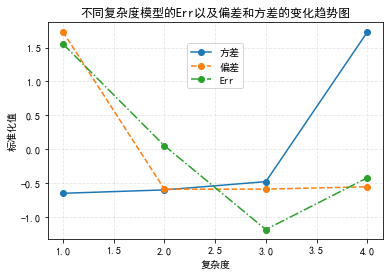

In [4]:
x0=np.array([x.mean(),x.mean()**2,x.mean()**3])
y0=14+5.5*x0[0]+4.8*x0[1]+0.5*x0[2]
X=x.reshape(N,1)
Y=np.array(z)
degree=[2,3]
for i in range(len(degree)):
    tmp=pow(x,degree[i]).reshape(N,1)
    X=np.hstack((X,tmp))
modelLR=LM.LinearRegression()
KNNregr=neighbors.KNeighborsRegressor(n_neighbors=5)
model1,model2,model3,model4=[],[],[],[]    
kf = KFold(n_splits=10,shuffle=True,random_state=123)
for train_index, test_index in kf.split(X):   
    Ntrain=len(train_index)
    XKtrain=X[train_index,]
    YKtrain=Y[train_index,]
    modelLR.fit(XKtrain[:,0].reshape(Ntrain,1),YKtrain)
    model1.append(modelLR.predict(x0[0].reshape(1,1)))
    modelLR.fit(XKtrain[:,0:2].reshape(Ntrain,2),YKtrain)
    model2.append(modelLR.predict(x0[0:2].reshape(1,2)))
    modelLR.fit(XKtrain[:,0:3].reshape(Ntrain,3),YKtrain)
    model3.append(modelLR.predict(x0[0:3].reshape(1,3)))
    KNNregr.fit(XKtrain[:,0].reshape(Ntrain,1),YKtrain)
    model4.append(KNNregr.predict(x0[0].reshape(1,1)))

fig,axes = plt.subplots(1,1,figsize=(6,4))
VI=[np.var(model1)/np.mean(model1),np.var(model2)/np.mean(model2),np.var(model3)/np.mean(model3),np.var(model4)//np.mean(model4)]
Err=[np.mean(model1)-y0,np.mean(model2)-y0,np.mean(model3)-y0,np.mean(model4)-y0]
Err=pow(np.array(Err),2)

axes.plot(np.arange(1,5),preprocessing.scale(VI),marker='o',linestyle='-',label='方差')
axes.plot(np.arange(1,5),preprocessing.scale(Err),marker='o',linestyle='--',label='偏差')
axes.plot(np.arange(1,5),preprocessing.scale(MSEMean),marker='o',linestyle='-.',label="Err")
axes.set_ylabel('标准化值')
axes.set_xlabel('复杂度')
axes.set_title('不同复杂度模型的Err以及偏差和方差的变化趋势图')
axes.grid(linestyle="--", alpha=0.3)
plt.legend(loc='center',bbox_to_anchor=(0.5,0.8))
fig.show()

说明：
1、对于上述模拟数据和四种复杂度模型，计算测试误差，偏差和方差，并直观展示它们之间的关系。
2、偏差是预测值的期望与真值的差，这里的真值指定为：输入变量均值点x0的输出变量真值y0。
3、代码中的VI是变异系数，等于方差除以均值。方差的数值大小受数量级的影响，变异系数消除了这个影响，便于对不同情况下数据离散程度大小的对比。
4、简单模型的偏差大方差小，复杂模型的偏差小方差大。